In [61]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

path = r'/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/rotations/result/csv' # use your path
all_files = glob.glob(path + "/*.csv")

df_groupby_res = {"360": {}, "720": {}, "1080": {}}

for filename in all_files:
    # print(filename)
    dist, tag, res  = filename.split('_')[-3:]
    res = res.split('.')[0]
    tag = tag.split('/')[-1]
    dist = dist.split('/')[-1]

    df = pd.read_csv(filename)
    df = df[['error', 'true_yaw']]
    # display(dist, res, tag)

    dic = {tag: df}
    if not dist in df_groupby_res[res]:
        df_groupby_res[res][dist] = {}
    df_groupby_res[res][dist].update(dic)



/home/hakanergin/code/apriltag_test_bench/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


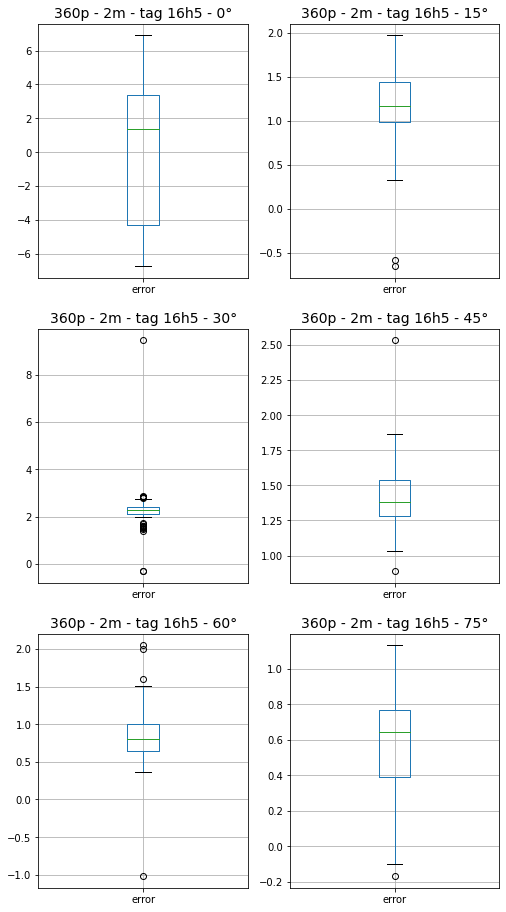

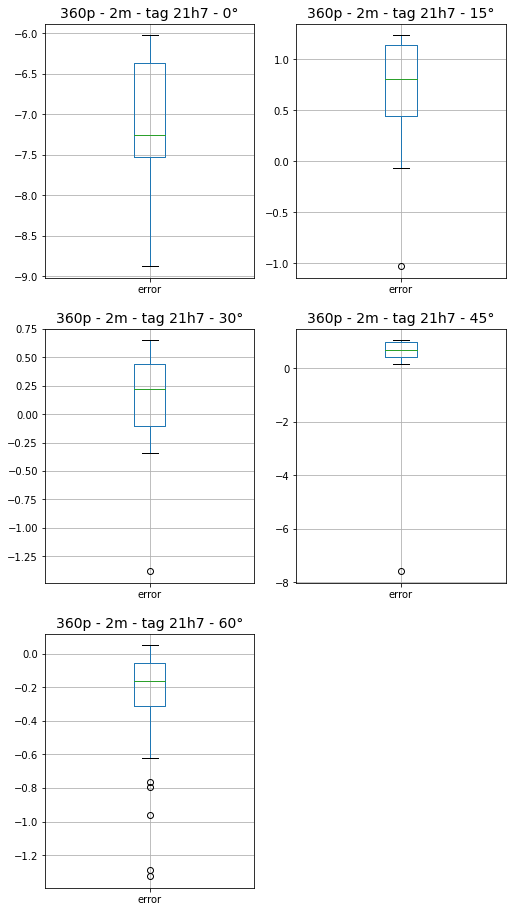

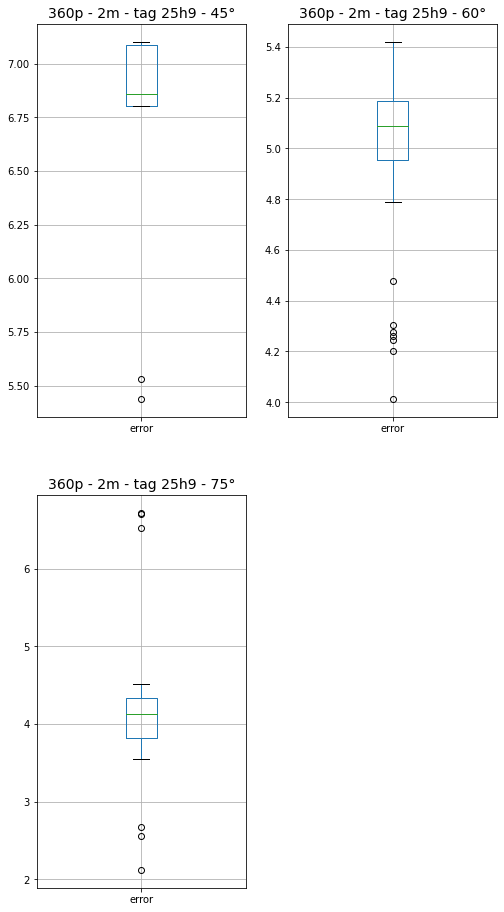

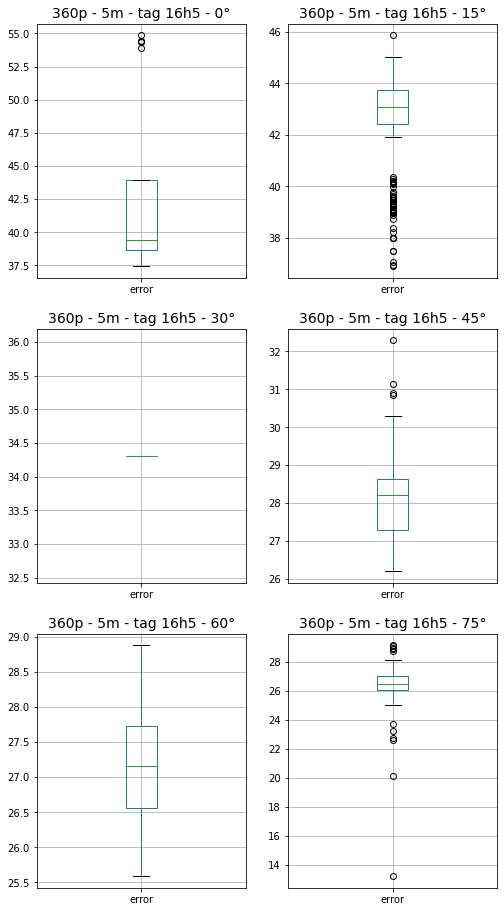

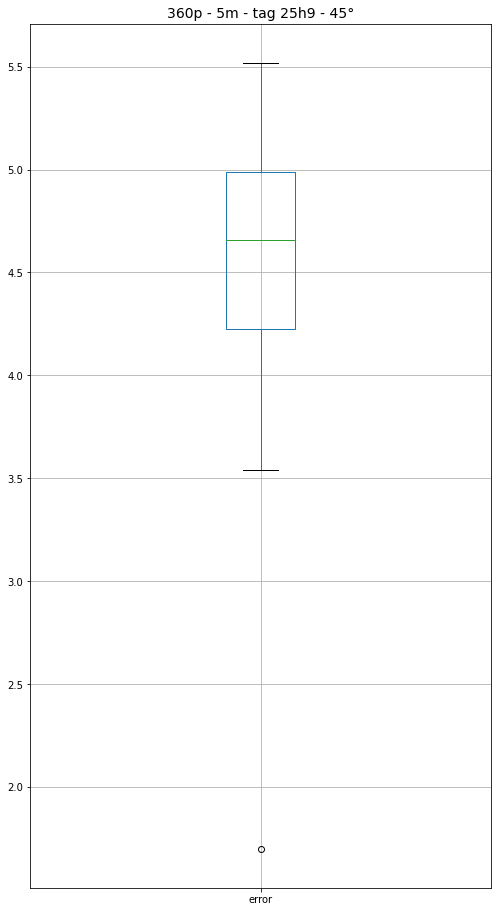

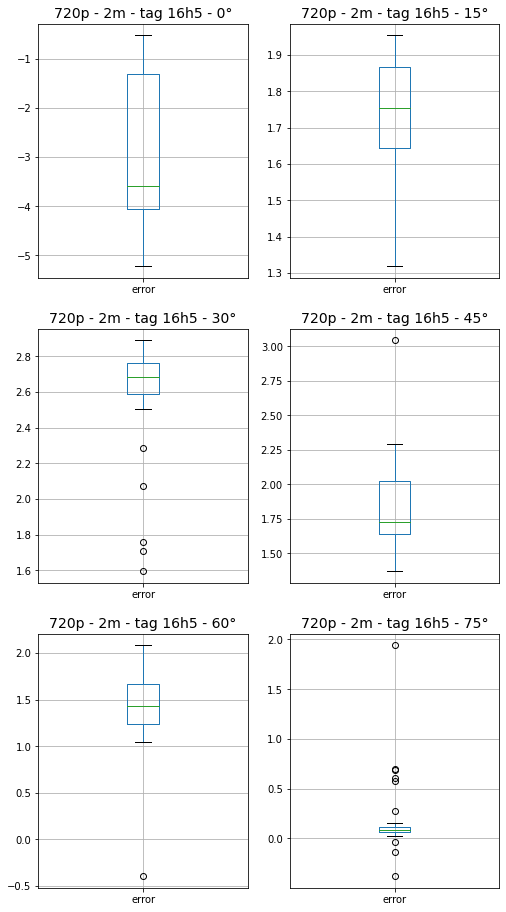

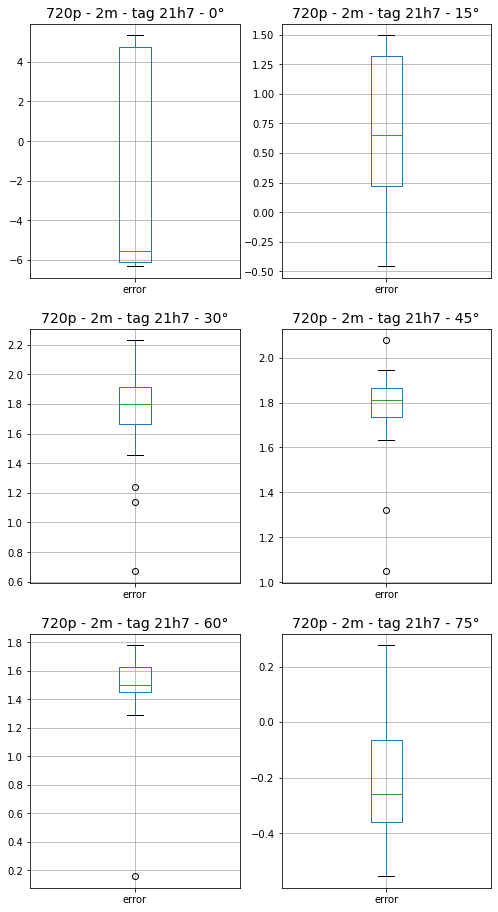

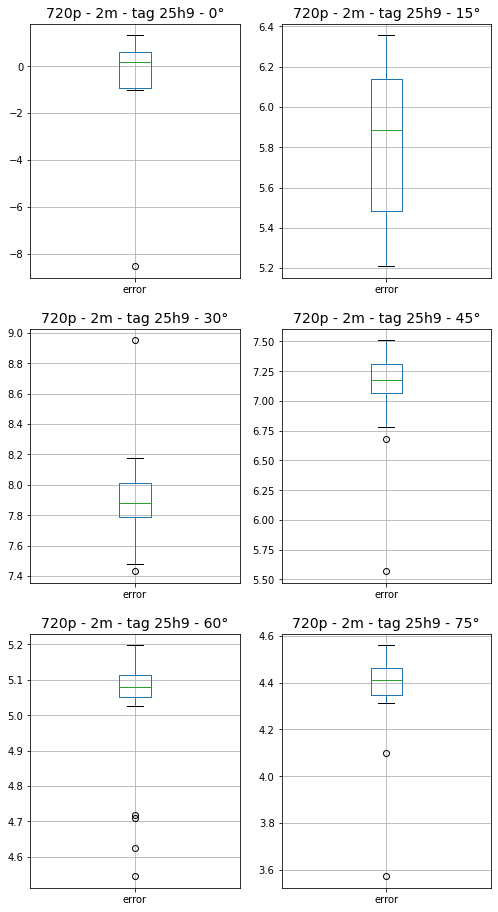

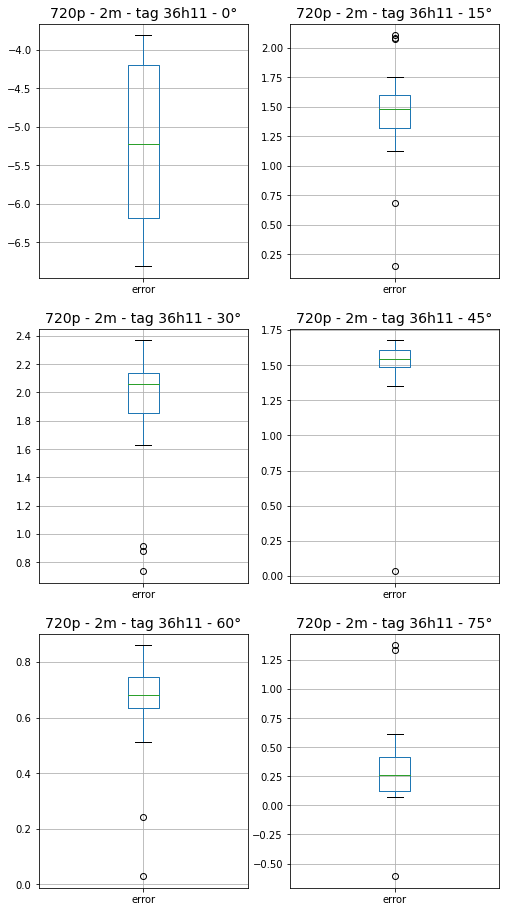

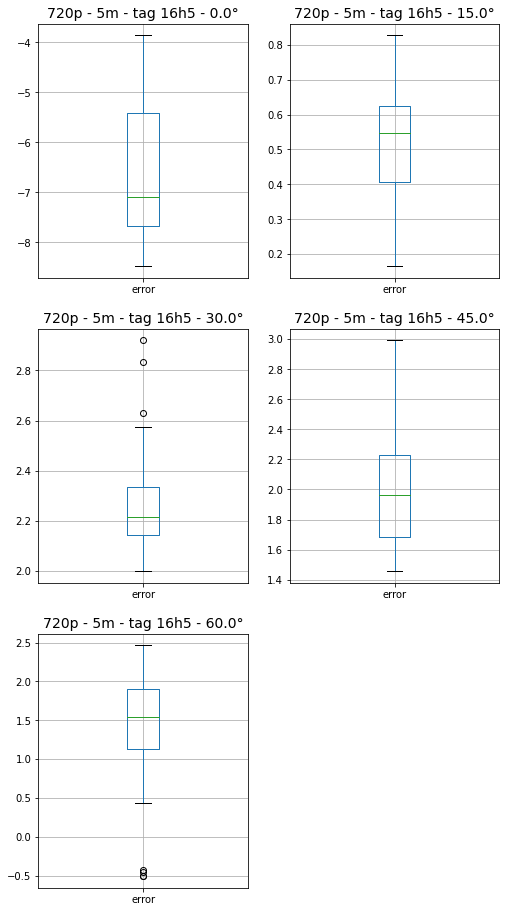

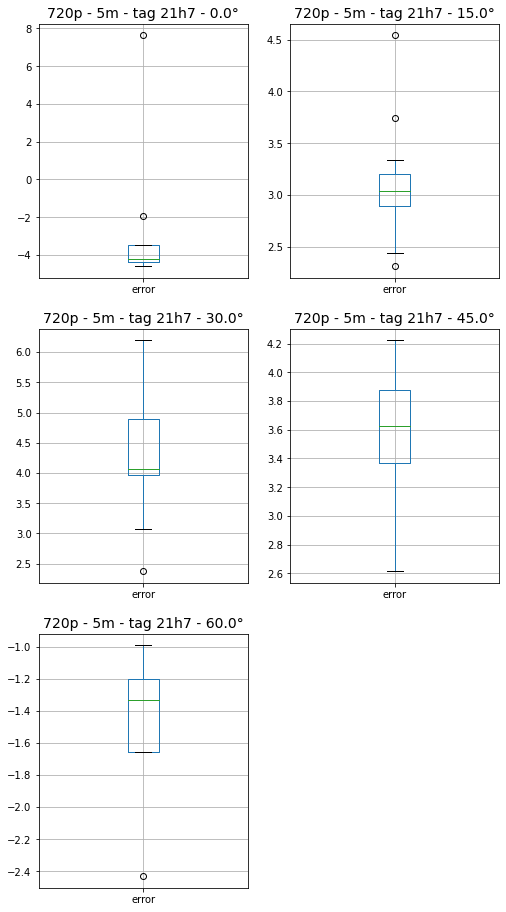

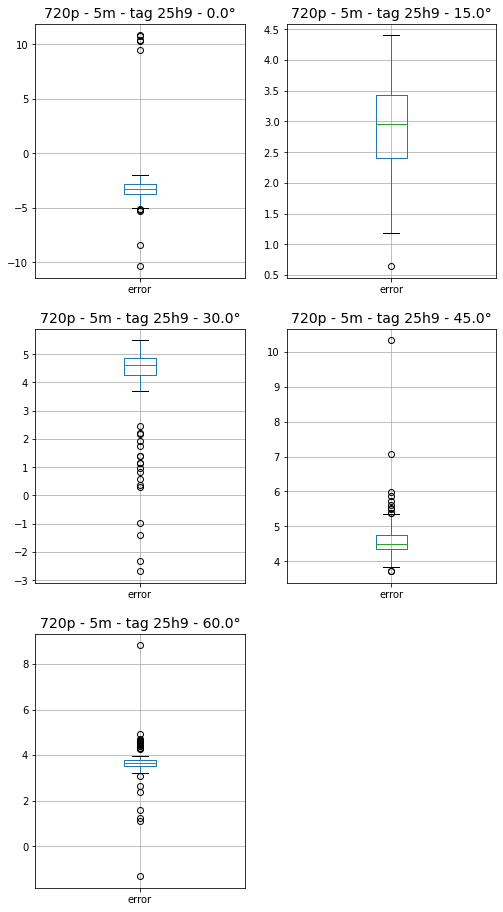

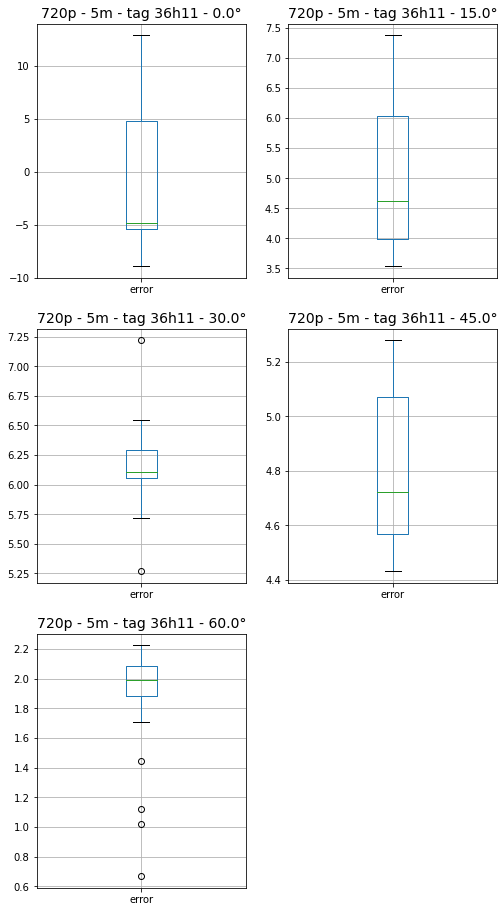

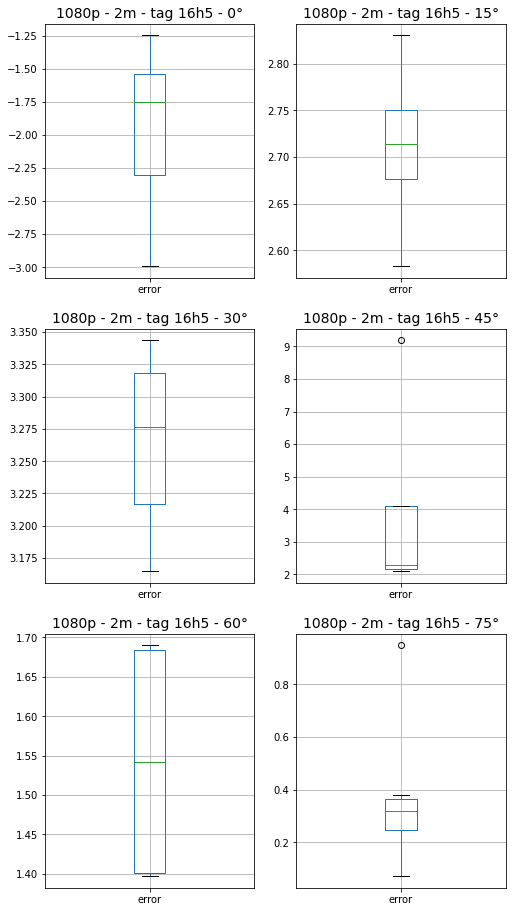

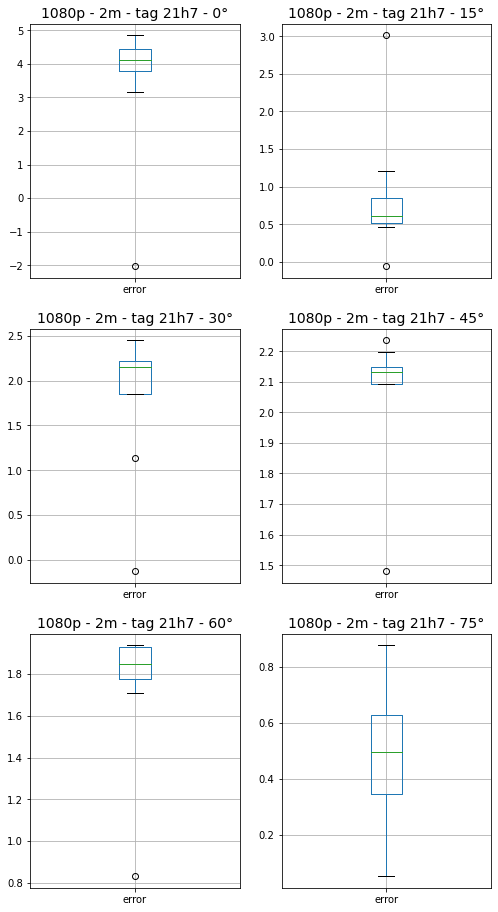

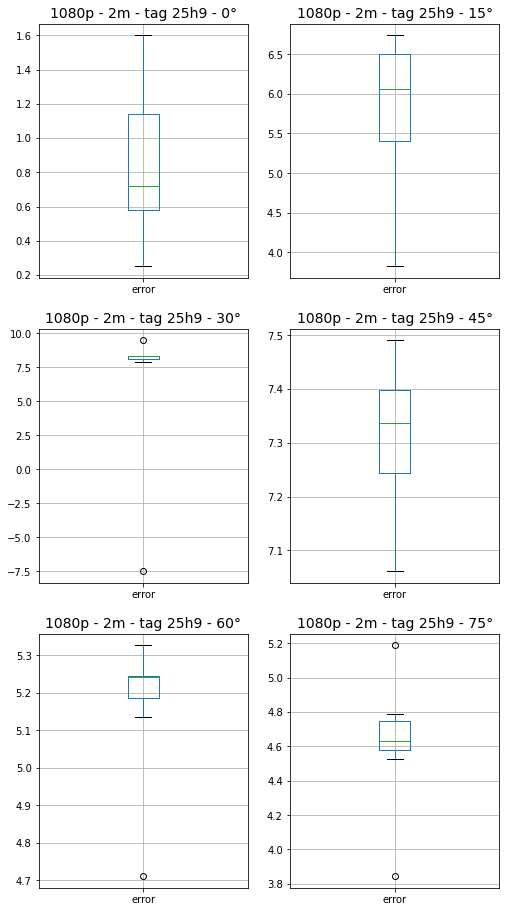

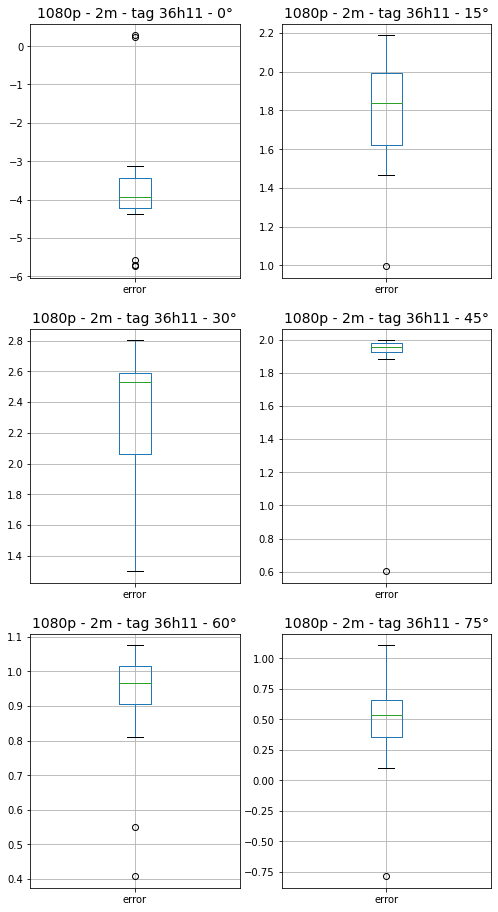

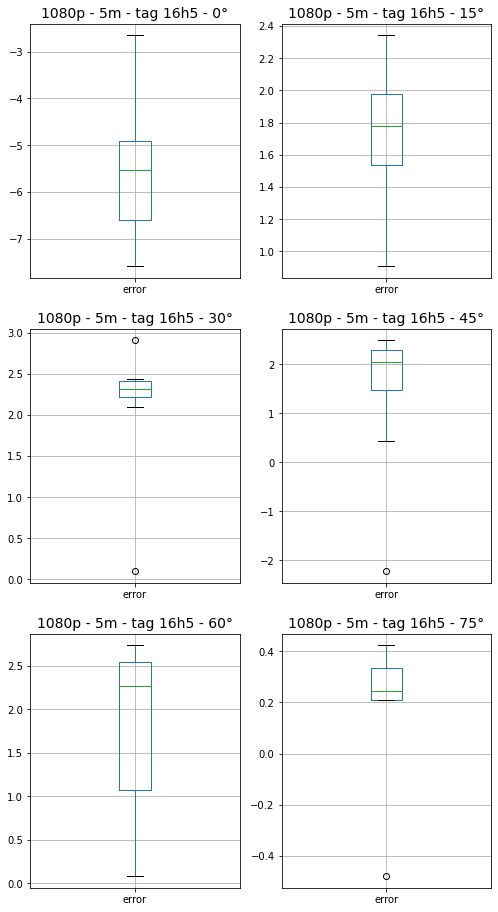

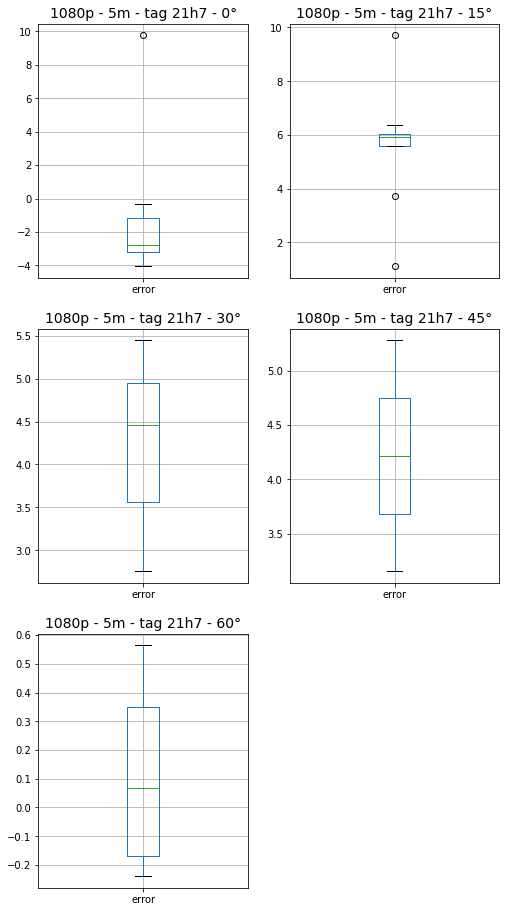

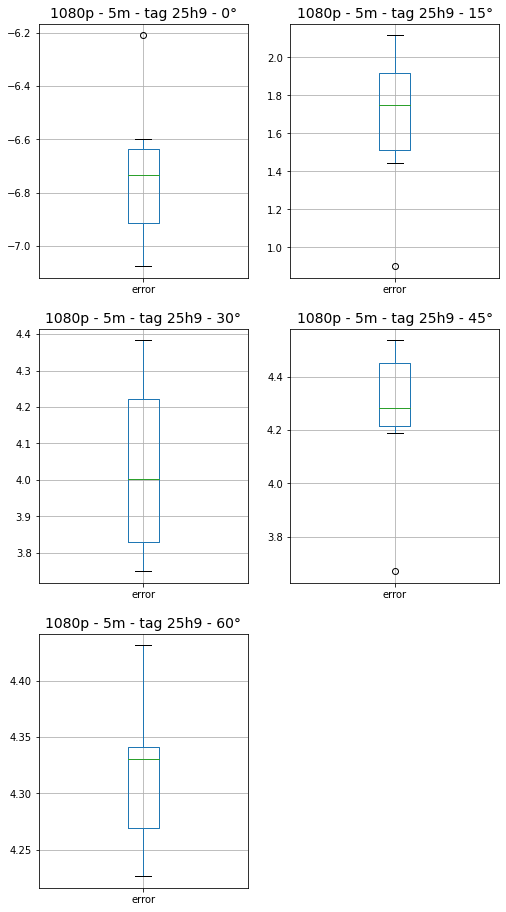

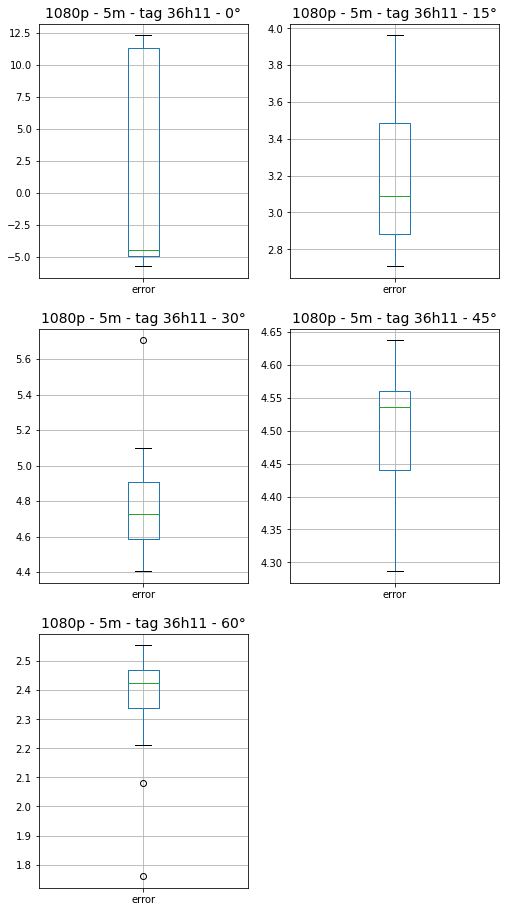

In [62]:
for res in df_groupby_res.keys(): # res
    for distance in sorted(df_groupby_res[res].keys()): # distance
        df = pd.concat(df_groupby_res[res][distance]).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)
        for i,tag in enumerate(sorted(df.tag.unique())):
            grouped_df = df.loc[df['tag']==tag].groupby('true_yaw')
            # print(grouped_df['true_yaw'].unique().values)
            ax = grouped_df.boxplot(column=['error'], figsize=(8,16), sharey=False)
            for yaw in grouped_df['true_yaw'].unique().values:
                dist_text = '{}p - {} - tag {} - {}°'.format(res, distance, tag, yaw[0])
                ax[yaw[0]].set_title(dist_text, fontsize=14)